<div style='text-align: center;'><h1> <span style='font-family:"Times New Roman"'> <span style=''>
    <b>NOAA Dataset</b><br></h1>
</div>
<h3 style='text-align: right;'> <span style='font-family:"Times New Roman"'> <span style=''>
    Nimisha A S <br> 
    Tranzmeo IT Solutions Pvt. limited <br>
</h3>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
temp = pd.read_csv("temperature.csv")
temp.sample(5)

,ID,Date,Element,Data_Value
122274,USC00205822,2005-06-23,TMAX,272
117400,USC00200220,2009-10-30,TMIN,72
84193,USC00200842,2009-11-17,TMAX,67
77222,USC00200032,2015-01-26,TMIN,-128
151761,USC00205450,2006-03-21,TMAX,17


In [3]:
temp.shape

(165085, 4)

In [4]:
bin = pd.read_csv("BinSize.csv")
bin.sample(3)

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
10410,USC00219249,44.2992,-92.6661,295.7,MN,ZUMBROTA,NaN,HCN,NaN,-7374608.964,4925853.253,-7447744.539494399 to -7350411.110778033,4913600.9074839875 to 5010934.336200354,"-7447744.539494399 to -7350411.110778033, 4913...",bf24b60b5987abba8b11562299308236afed96352d8d19...
16611,USS0017A01S,48.6900,-117.1800,1524.0,WA,Bunchgrass Mdw,NaN,NaN,NaN,-8601424.420,5414088.627,-8615745.684090782 to -8518412.255374417,5400268.051065814 to 5497601.47978218,"-8615745.684090782 to -8518412.255374417, 5400...",47730c6b8bb3a1831f7deb1d4e5314b1710acac4380096...
8609,USC00080992,27.0436,-81.0700,4.3,FL,BRIGHTON RSVN,NaN,NaN,NaN,-8028937.842,3007115.366,-8031745.1117925905 to -7934411.683076224,2966932.3331566826 to 3064265.7618730483,"-8031745.1117925905 to -7934411.683076224, 296...",aa3ccad2910a1ff2a5863f1a228c24da9431cc1236b731...


In [5]:
bin.shape

(18259, 15)

## Exploratory Data Analysis and Data Preprocessing

In [7]:
df = pd.merge(temp, bin, on = "ID")
df.head(3)

,ID,Date,Element,Data_Value,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,USW00094889,2014-11-12,TMAX,22,42.2228,-83.7444,255.7,MI,ANN ARBOR MUNI AP,NaN,NaN,NaN,-6895857.249,4694967.781,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
1,USC00208972,2009-04-29,TMIN,56,42.4356,-83.7831,276.1,MI,WHITMORE LAKE 1NW,NaN,NaN,NaN,-6875743.907,4718630.095,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...
2,USC00200032,2008-05-26,TMAX,278,41.9164,-84.0158,231.6,MI,ADRIAN 2 NNE,NaN,HCN,NaN,-6951679.487,4660897.607,-6961077.395912573 to -6863743.967196207,4621600.621334892 to 4718934.050051258,"-6961077.395912573 to -6863743.967196207, 4621...",fb441e62df2d58994928907a91895ec62c2c42e6cd075c...


In [8]:
df.shape

(165085, 18)

Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization. 

In [9]:
df = df[~df.Date.str.endswith("-02-29")]
df.shape

(165002, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165002 entries, 0 to 165084
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          165002 non-null  object 
 1   Date        165002 non-null  object 
 2   Element     165002 non-null  object 
 3   Data_Value  165002 non-null  int64  
 4   LATITUDE    165002 non-null  float64
 5   LONGITUDE   165002 non-null  float64
 6   ELEVATION   165002 non-null  float64
 7   STATE       165002 non-null  object 
 8   NAME        165002 non-null  object 
 9   GSNFLAG     0 non-null       object 
 10  HCNFLAG     15869 non-null   object 
 11  WMOID       0 non-null       float64
 12  x           165002 non-null  float64
 13  y           165002 non-null  float64
 14  x_group     165002 non-null  object 
 15  y_group     165002 non-null  object 
 16  xy_group    165002 non-null  object 
 17  hash        165002 non-null  object 
dtypes: float64(6), int64(1), object(11)
memory usage:

In [11]:
df.HCNFLAG.unique()

array([nan, 'HCN'], dtype=object)

In [12]:
for i in df.columns:
    print(i, ": ", df[i].nunique(), "\n")

ID :  24 

Date :  4015 

Element :  2 

Data_Value :  185 

LATITUDE :  24 

LONGITUDE :  24 

ELEVATION :  23 

STATE :  2 

NAME :  24 

GSNFLAG :  0 

HCNFLAG :  1 

WMOID :  0 

x :  24 

y :  24 

x_group :  1 

y_group :  1 

xy_group :  1 

hash :  1 



In [13]:
df.Date = pd.to_datetime(df.Date)
df.Date.info()

<class 'pandas.core.series.Series'>
Index: 165002 entries, 0 to 165084
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
165002 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 MB


In [14]:
df.drop(["hash", "GSNFLAG", "WMOID", "HCNFLAG", "x_group", "y_group", "xy_group"], axis = 1, inplace = True)

In [15]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165002 entries, 0 to 165084
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          165002 non-null  object        
 1   Date        165002 non-null  datetime64[ns]
 2   Element     165002 non-null  object        
 3   Data_Value  165002 non-null  int64         
 4   LATITUDE    165002 non-null  float64       
 5   LONGITUDE   165002 non-null  float64       
 6   ELEVATION   165002 non-null  float64       
 7   STATE       165002 non-null  object        
 8   NAME        165002 non-null  object        
 9   x           165002 non-null  float64       
 10  y           165002 non-null  float64       
 11  Year        165002 non-null  int32         
 12  Month       165002 non-null  int32         
 13  Day         165002 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1), object(4)
memory usage: 17.0+ MB


In [16]:
df.columns

Index(['ID', 'Date', 'Element', 'Data_Value', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'STATE', 'NAME', 'x', 'y', 'Year', 'Month', 'Day'],
      dtype='object')

In [17]:
df["Data_Value"] = df["Data_Value"] / 10
df.sample(2)

,ID,Date,Element,Data_Value,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,x,y,Year,Month,Day
97921,USC00205050,2005-02-23,TMIN,-8.9,42.1508,-84.0236,294.1,MI,MANCHESTER,-6926732.237,4686961.735,2005,2,54
104435,USC00205563,2007-07-06,TMAX,27.2,41.9069,-83.4158,178.6,MI,MONROE,-6903061.280,4659841.254,2007,7,187


In [18]:
df.describe()

,Date,Data_Value,LATITUDE,LONGITUDE,ELEVATION,x,y,Year,Month,Day
count,165002,165002.000000,165002.000000,165002.000000,165002.000000,1.650020e+05,1.650020e+05,165002.000000,165002.000000,165002.000000
mean,2010-06-20 14:25:34.672307200,9.547632,42.098629,-83.777851,240.024183,-6.912091e+06,4.681161e+06,2009.968085,6.531975,183.351450
min,2005-01-01 00:00:00,-34.300000,41.563100,-84.466700,176.200000,-6.951679e+06,4.621612e+06,2005.000000,1.000000,1.000000
25%,2007-11-07 00:00:00,0.000000,41.955300,-83.985800,204.200000,-6.935468e+06,4.665223e+06,2007.000000,4.000000,92.000000
50%,2010-06-24 00:00:00,9.400000,42.123600,-83.761100,237.700000,-6.905742e+06,4.683937e+06,2010.000000,7.000000,184.000000
75%,2013-01-19 00:00:00,18.900000,42.241700,-83.618600,274.300000,-6.889586e+06,4.697069e+06,2013.000000,10.000000,274.000000
max,2015-12-31 00:00:00,40.600000,42.435600,-83.280000,304.200000,-6.875744e+06,4.718630e+06,2015.000000,12.000000,366.000000
std,NaN,12.351344,0.205990,0.266506,38.635630,2.461692e+04,2.290507e+04,3.092705,3.447177,105.383052


In [19]:
df_grouped = df.groupby(["Day"])["Data_Value"].agg(["min", "max"])
df_grouped

,min,max
Day,,
1,-16.0,15.6
2,-26.7,13.9
3,-26.7,13.3
4,-26.1,10.6
5,-15.5,12.8
...,...,...
362,-13.8,18.9
363,-16.6,19.4
364,-15.0,12.8


Familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded. 

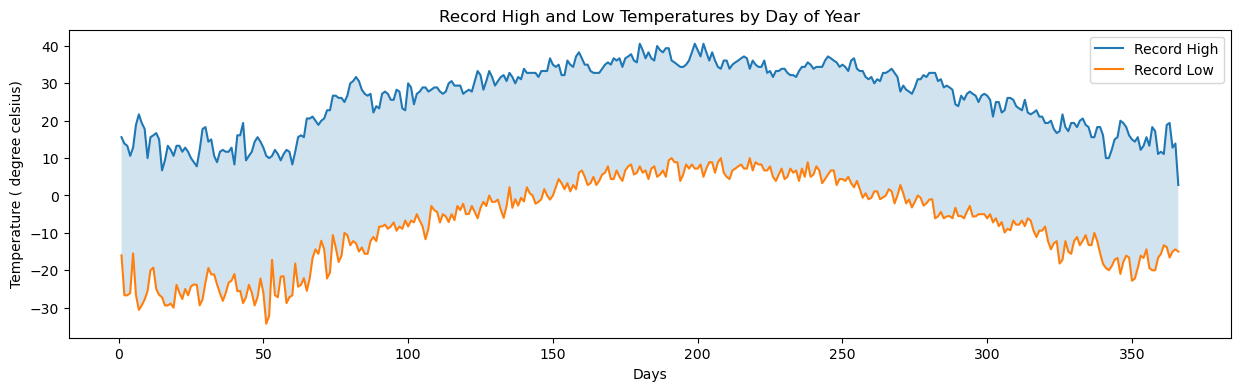

In [20]:
plt.figure(figsize = (15, 4))
plt.plot(df_grouped.index, df_grouped["max"], label="Record High")
plt.plot(df_grouped.index, df_grouped["min"], label="Record Low")
plt.xlabel("Days")
plt.ylabel("Temperature ( degree celsius)")
plt.legend()
plt.fill_between(df_grouped.index, df_grouped["max"], df_grouped["min"], alpha=0.2)
plt.title("Record High and Low Temperatures by Day of Year")

plt.show()

Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. 


     Day  min_x  max_x  min_y  max_y
39    40  -11.6    8.3  -21.0    7.8
106  107    4.4   27.8   -8.9   27.2
126  127    8.3   30.6   -2.8   26.1
127  128    8.9   33.3    0.0   31.7
130  131   13.3   30.6   -1.1   29.4
137  138   12.8   31.7   -2.7   28.9
207  208   12.8   33.9   10.0   33.3
209  210   12.8   36.1    5.0   33.9
249  250   15.6   35.0    4.4   31.7
258  259    6.7   31.1   -1.0   30.6
259  260    7.8   31.7   -0.6   28.9
260  261   10.6   30.0    1.1   29.4
270  271   11.7   29.4    0.6   28.3
271  272   11.1   28.3   -2.1   27.8
292  293   -3.9   27.2   -4.3   22.2
305  306   -1.0   22.8   -9.9   22.2
306  307    1.1   26.1   -8.9   22.2
307  308    3.3   26.1   -9.3   25.0
308  309    3.9   25.6   -6.7   23.9
321  322    2.8   20.0  -14.4   19.4
340  341   -6.7   10.0  -19.4    6.7
341  342   -6.7   10.0  -20.0    8.3
342  343   -3.3   12.2  -18.9    8.3
343  344   -4.4   15.0  -17.2   11.1
344  345    0.0   15.6  -16.7   12.8
345  346    2.8   20.0  -21.0   13.3
3

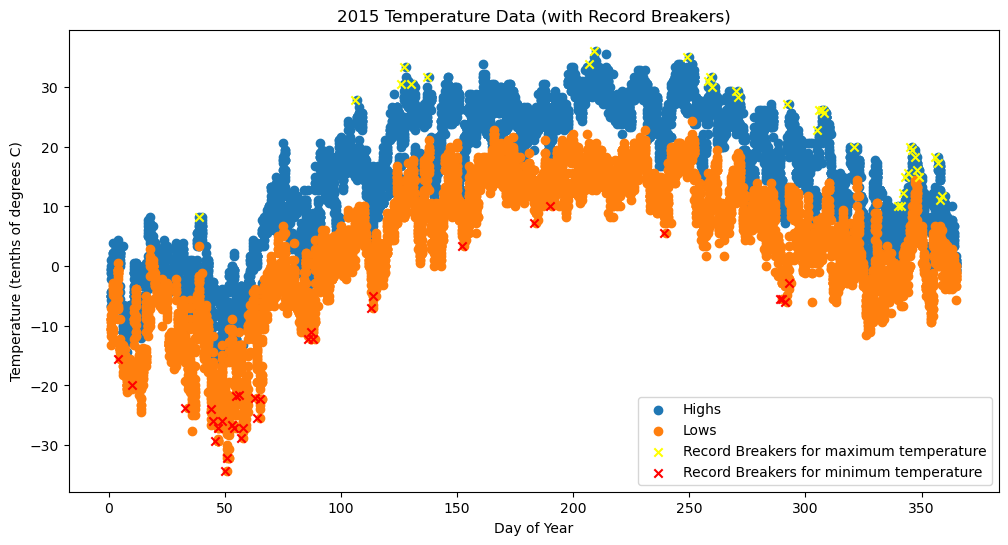

In [46]:
# Filter the data for 2015
df_2015 = df[df["Year"] == 2015]
df_2015_grouped = df_2015.groupby("Day")["Data_Value"].agg(["min", "max"])
df_2015_grouped.reset_index(inplace=True)

df_05_14 = df[(df["Year"] >= 2005) & (df["Year"] < 2015)]
df_grouped_05_14 = df_05_14.groupby(["Day"])["Data_Value"].agg(["min", "max"])
df_grouped_05_14.reset_index(inplace=True)

df_grouped = pd.merge(df_2015_grouped, df_grouped_05_14, on = "Day")

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df_2015[df_2015["Element"] == "TMAX"]["Day"], df_2015[df_2015["Element"] == "TMAX"]["Data_Value"], label="Highs")
plt.scatter(df_2015[df_2015["Element"] == "TMIN"]["Day"], df_2015[df_2015["Element"] == "TMIN"]["Data_Value"], label="Lows")

# Highlight points that break the record
max_temp = df_2015["Element"] == "TMAX"
min_temp = df_2015["Element"] == "TMIN"

record_breakers1 = df_grouped[df_grouped["max_x"] > df_grouped["max_y"]] 
record_breakers2 = df_grouped[df_grouped["min_x"] < df_grouped["min_y"]]

print(record_breakers1, "\n\n", record_breakers2)

plt.scatter(record_breakers1.index, record_breakers1["max_x"], label="Record Breakers for maximum temperature", marker="x", color="yellow")
plt.scatter(record_breakers2.index, record_breakers2["min_x"], label="Record Breakers for minimum temperature", marker="x", color="red")

# Add labels and legend
plt.title("2015 Temperature Data (with Record Breakers)")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (tenths of degrees C)")
plt.legend()

plt.show()


visualize on map the stations the data.

In [54]:
locations = dict(zip(df.LATITUDE, df.LONGITUDE))
latitudes = list(df.LATITUDE)
longitudes = list(df.LONGITUDE)

m = folium.Map(location = [latitudes[0], longitudes[0]], zoom_start = 2)

for lat, long in zip(latitudes, longitudes):
    folium.Marker(location = [lat, long], popup = "ID").add_to(m)

m.save("Places.html")

Plot Temperature Summary near Ann Arbor, Michigan, United States (Year 2015).

Temperature Summary for 2015:
              max         min
count  365.000000  365.000000
mean    18.750137    0.101096
std     11.478098   11.450546
min    -12.100000  -34.300000
25%     10.000000   -6.100000
50%     20.600000    1.100000
75%     28.300000   10.000000
max     36.100000   17.800000


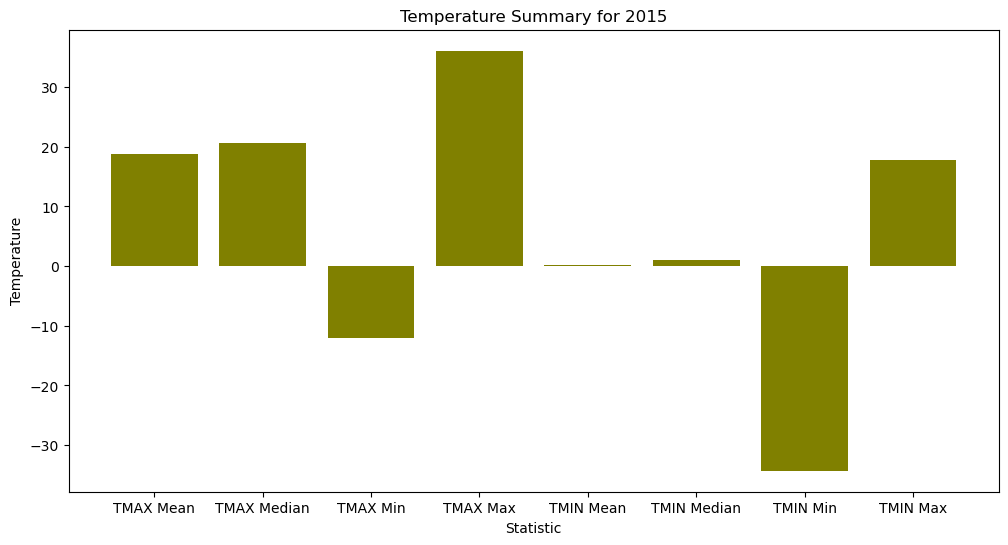

In [52]:
 # Filter the data for 2015
df_2015 = df[df["Year"] == 2015]
df_grouped = df_2015.groupby(["Day"])["Data_Value"].agg(["min", "max"])
df_grouped.reset_index(inplace=True)

# Calculate summary statistics
summary_stats = df_grouped[["max", "min"]].describe()

# Print the summary statistics
print("Temperature Summary for 2015:")
print(summary_stats)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(["TMAX Mean", "TMAX Median", "TMAX Min", "TMAX Max", "TMIN Mean", "TMIN Median", "TMIN Min", "TMIN Max"], 
        [summary_stats["max"]["mean"], summary_stats["max"]["50%"], summary_stats["max"]["min"], summary_stats["max"]["max"],
         summary_stats["min"]["mean"], summary_stats["min"]["50%"], summary_stats["min"]["min"], summary_stats["min"]["max"]
        ], color = "olive")

# Add labels and title
plt.title("Temperature Summary for 2015")
plt.xlabel("Statistic")
plt.ylabel("Temperature")

plt.show()
